# Ensemble Methods
1. Ensemble Methods are machine learning algorithms that rely on the "Wisdom of the Crowd"

2. Many weak algorithms working together do better than 1 big, monolithic algorithm

3. They are two major groups for ensemble methods: Random Forests and Gradient Boosted Trees



## Random Forest
- Random Forest is a name for a supervised learning

- Random Forest is just a collection of many small Decision Trees

- Assume we have a dataset with 10 columns, and thousands of rows. Random forest 
algorithm would start by randomly selecting around 2/3 of the rows, and then randomly selecting 6 columns in the data

## Activity: Apply Random Forest to iris dataset
- Read : https://www.datacamp.com/community/tutorials/random-forests-classifier-python

1. Finish the turorial and then answer the following questions:

    - Obtain the feature importance: clf.feature_importances_

    - Change number of estimator (n_estimators) and compare the accuracy result



In [1]:
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
iris = datasets.load_iris()


In [3]:
# print the label species(setosa, versicolor,virginica)
print(iris.target_names)

# print the names of the four features
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [4]:
# print the iris data (top 5 records)
print(iris.data[0:5])

# print the iris labels (0:setosa, 1:versicolor, 2:virginica)
print(iris.target)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [5]:
# Creating a DataFrame of given iris dataset.
import pandas as pd
data=pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})
data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### First, you separate the columns into dependent and independent variables (or features and labels). 
### Then you split those variables into a training and test set.

In [6]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X=data[['sepal length', 'sepal width', 'petal length', 'petal width']]  # Features
y=data['species']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

### Fitting the model

In [7]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

### Prediction

In [8]:
y_pred=clf.predict(X_test)

### Check accuracy 

In [9]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9333333333333333


In [11]:
# You can also make a prediction for a single item, for example:

# sepal length = 3
# sepal width = 5
# petal length = 4
# petal width = 2
clf.predict([[3, 5, 4, 2]])


array([1])

# Finding Important Features in Scikit-learn
- Here, you are finding important features or selecting features in the IRIS dataset. In scikit-learn, you can perform this task in the following steps:

- First, you need to create a random forests model.
- Second, use the feature importance variable to see feature importance scores.
- Third, visualize these scores using the seaborn library.

In [12]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [13]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
feature_imp

petal length (cm)    0.481820
petal width (cm)     0.396889
sepal length (cm)    0.100072
sepal width (cm)     0.021219
dtype: float64

No handles with labels found to put in legend.


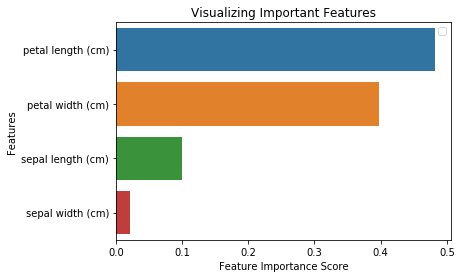

In [14]:
# You can also visualize the feature importance. Visualizations are easy to understand and interpretable.

# For visualization, you can use a combination of matplotlib and seaborn. Because seaborn is 
# built on top of matplotlib, it offers a number of customized themes and provides additional plot 
# types. Matplotlib is a superset of seaborn and both are equally important for good visualizations.


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [15]:
# NOTE: Random forest because its a collection of random decision trees

---

# Gradient Boosting
- In boosting, the trees are built sequentially such that each subsequent tree aims to reduce the errors of the previous tree

- The tree that grows next in the sequence will learn from an updated version of the residuals

In [17]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
from sklearn.tree import export_graphviz
import pydotplus

# Feature, years of work experience
X = np.array([5, 7, 12, 23, 25, 28, 29, 34, 35, 40])
# Target, salary in in thousand dollars
Y = np.array([82, 80, 103, 118, 172, 127, 204, 189, 99, 166])

# Compute the mean of target and subtract from target
F0 = np.mean(Y)
print(F0)

# Build and train the simple Regression Model with DT
regre = DecisionTreeRegressor(max_depth=1)
regre.fit(X.reshape(-1, 1), (Y-F0).reshape(-1, 1))


# Draw graph
dot_data = export_graphviz(regre, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)
# graph.write_png('simple_reg_tree_step1.png') # run only once 

134.0


True

In [25]:
# # Feature, years of work experience
# X = np.array([5, 7, 12, 23, 25, 28, 29, 34, 35, 40])
# # Target, salary in in thousand dollars
# Y = np.array([82, 80, 103, 118, 172, 127, 204, 189, 99, 166])

# iteration = 3
# F = np.zeros((iteration+1, len(Y)))
# for i in range(iteration):
#     regre = DecisionTreeRegressor(max_depth=1)
#     if i == 0:
#         F[i] = np.mean(Y)
#     regre.fit(X.reshape(-1, 1), (Y-F[i]).reshape(-1, 1))
#     F[i+1] = F[i] + regre.predict(X.reshape(-1, 1))
# plt.plot(X, F[-1])
# plt.scatter(X, Y) 

## From class notes

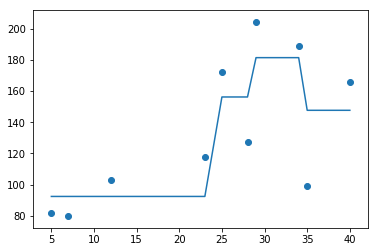

In [31]:
# Iteratively predict Y from X using Boosting method

from sklearn.tree import DecisionTreeRegressor
import numpy as np
import matplotlib.pyplot as plt

# Feature, years of work experience
X = np.array([5, 7, 12, 23, 25, 28, 29, 34, 35, 40])
# Target, salary in in thousand dollars
Y = np.array([82, 80, 103, 118, 172, 127, 204, 189, 99, 166])

iteration = 3
# we are creating the array with zeros so it is memory efficient 
F = np.zeros((iteration+1, len(Y))) 
for i in range(iteration):
    regre = DecisionTreeRegressor(max_depth=1)
    if i == 0:
        F[i] = np.mean(Y)
    regre.fit(X.reshape(-1, 1), (Y-F[i]).reshape(-1, 1))
    # h[i] = regre.predict(X.reshape(-1, 1)), we do not need to define separate variable for h
    F[i+1] = F[i] + regre.predict(X.reshape(-1, 1))
    
    

plt.plot(X, F[-1])
plt.scatter(X, Y)

In [32]:
# Xgboost beat all classifier models in terms of accuracy because it uses the previous decision tree 

# Summary
- Ensemble Methods are machine learning algorithms that rely on the "Wisdom of the Crowd"

- Many weak algorithms working together do better than 1 big, monolithic algorithm

- In boosting, each tree will learn from an updated version of the residuals

- They are two major groups for ensemble methods:

- Random Forests

- Gradient Boosted Trees

- The Ensemble methods are able to obtain and rank the feature importance

# Resources:
- https://www.datacamp.com/community/tutorials/random-forests-classifier-python

- https://www.analyticsvidhya.com/blog/2018/09/an-end-to-end-guide-to-understand-the-math-behind-xgboost/

- https://www.datacamp.com/community/tutorials/xgboost-in-python